In [46]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

plt.style.use("fivethirtyeight")

colors = ["Teal","Indigo","HotPink","DarkGoldenRod","Coral"]

Data is prepared as it has been provided by Bülent Esen's notebook https://www.kaggle.com/bulentesen/cardiac-arrythmia-naive-bayes-v2 who is the publisher of the dataset. No further data preparation besides the ones in cell 8 were not pursued since the data preparataion should be at it's best under the owner's own usage.

In [47]:
print(os.listdir('/'))

['$RECYCLE.BIN', 'android-x86-9.0-r2.iso', 'apache-jmeter-5.5', 'Files', 'kali-linux-2022.3-installer-amd64.iso', 'Student-Management-System-in-Python-main', 'System Volume Information', 'Windows10 x64(19045.2075).ISO', 'XuJiantao', '虚拟机VMware 15.5.0', '虚拟机VMware 15.5.0.zip']


Data is a .CSV file which contains all the possible instructions that can be obtained from ECG readings. However some of the columns have unreliable data (nulls and just vectors of singular values to be exact). So the owner of the dataset seems to drop these columns not applying any interpolation implementation. So, this notebook doesn't follow any interpolation measure either.

In [48]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')

In [49]:
columns_to_replace = ['T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)']
for col in columns_to_replace:
    df[col].replace('?', -1, inplace=True)

In [50]:
df.head()

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [51]:
df.drop(["S\'_wave(ms)","CB","CD","CS","EV","EY","FF","FH","FJ","FL","FS","FZ","GA","S'_wave(mv)","IB","KP","LC",
         "AB", "AC", "AD","AE", "AF", "AG","AH","AI","AJ","AK","AL", "AM","AN", "AO", "AP", "AR", "AS", "AT","AU", "AV",  "AY",  "AZ", "BA", "BB","BC", "BD", "BE", "BF","BG", "BH","BI", "BJ", "BK", "BL", "BM", "BN",   "BP", "BR", "BS", "BT", "BU","BV","BY","BZ", "CA", "CC", "CE", "CF", "CG", "CH", "CI", "CJ","CK","CL","CM","CN","CO","CP","CR",   "CT","CU","CV","CY","CZ","DA","DB","DC","DD","DE","DF","DG","DH","DI","DJ","DK","DL","DM","DN","DO","DP","DR","DS","DT","DU","DV","DY","DZ","EA","EB","EC","ED","EF","EG","EH","EI","EJ","EK", "EL","EM","EM","EN","EO","EP", "ER","ES", "ET", "EU",

         "EZ", "FA","FB","FC","FD", "FE",    "FG",    "FI",    "FK",    "FM","FN","FO","FP", "FR",    "FT", "FU", "FV", "FY",     "GB",   "GM","GN","GO","GP",   "GR","GS","GT","GU","GV",    "GY","GZ","HA","HB","HC","HD", "HE","HF","HG","HH","HI","HJ","HK","HL","HM","HN","HO","HP","HR","HS","HT","HU","HV","HY","HZ","IA","IC","ID","IE","IF","IG","IH","II","IJ","IK","IL", "IM","IN","IO","IP","IR","IS","IT","IU","IV", "IY","IZ", "JA","JB","JC","JD","JE","JF","JG","JH","JI","JJ", "JK", "JL","JM","JN","JO","JP","JR","JS","JT","JU","JV","JY","JZ", "KA","KB","KC","KD","KE","KF","KG","KH","KI","KJ","KK","KL","KM","KN", "KO", "KR","KS","KT","KU","KV","KY","KZ", "LA","LB", "LC","LD","LE","LF","LG"
         ], axis=1, inplace=True)#axis=1指定删除的是列而不是行，inplace=True指定对原始DataFrame进行更改，而不是返回一个修改后的副本。

In [52]:
df.head()

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,...,JJ_wave(mv),Q_wave(mv),R_wave(mv),S_wave(mv),R'_wave(mv),P_wave(mv),T_wave(mv),QRSA(mvs),QRSTA(mvs),diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.2,0.0,6.1,-1.0,0.0,0.6,2.1,13.6,30.8,8
1,56,1,165,64,81,174,401,149,39,25,...,-0.6,0.0,7.2,0.0,0.0,0.4,1.5,17.2,26.5,6
2,54,0,172,95,138,163,386,185,102,96,...,1.0,0.0,4.5,-2.8,0.0,0.3,2.5,-2.2,19.8,10
3,55,0,175,94,100,202,380,179,143,28,...,0.9,0.0,7.8,-0.7,0.0,1.1,1.9,27.3,45.1,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,0.0,5.2,-1.4,0.0,0.9,2.3,9.6,31.6,7


Further investigating the data have revealed there are some odd entries for the entries that are made presumably for babies which is handled manually. https://www.kaggle.com/mtavares51/binary-classification-on-arrhythmia-dataset

In [53]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

In [54]:
df.loc[df["height"] == 608, "height"] = 61
df.loc[df["height"] == 780, "height"] = 78
df['height'].value_counts().sort_index()

61      1
78      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
Name: height, dtype: int64

There are 16 classes as follows
<ol>
<li>Normal                     </li>
<li>Ischemic changes (Coronary Artery Disease</li>
<li>Old Anterior Myocardial Infarction     </li>
<li>Old Inferior Myocardial Infarction     </li>
<li>Sinus tachycardy                 </li>
<li>Sinus bradycardy                 </li>
<li>Ventricular Premature Contraction (PVC)</li>
<li>Supraventricular Premature Contraction </li>
<li>Left bundle branch block                 </li>
<li>Right bundle branch block             </li>
<li>1. degree AtrioVentricular block            </li>
<li>2. degree AV block             </li>
<li>3. degree AV block             </li>
<li>Left ventricule hypertrophy          </li>
<li>Atrial Fibrillation or Flutter         </li>
<li>Others                     </li>
</ol>

However only first one is a normal kind of arrythmia where the other classes can be superclassed as risky arrythmia cases. In this notebook, all cases are classified as either normal or risky. Risky being the positive (True) case and normal being the negative (False) case, diagnosis column is reworked as follows.

In [55]:
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()

True     245
False    207
Name: label, dtype: int64

X is formed by importing every data at first. All the dimensionality reduction will be applied afterwards. Y is the label column.

In [56]:
X = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]
print(X.shape)
print(y.shape)

(452, 30)
(452,)


A train test split have been implemented with 0.2 test_size value.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 30)
(361,)
(91, 30)
(91,)


For every column, a MinMaxScaler have been implemented

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the classifier and the parameter grid
clf = GaussianNB(var_smoothing=0.001)
# param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Use GridSearchCV to find the optimal parameters
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
clf.fit(X_train, y_train)

# Print the best parameters and the best accuracy
# print("Best parameters: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)

# Predict using the best classifier
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
# 计算准确率
acc = accuracy_score(y_test, y_pred)
print('GNB_Accuracy:', acc)

# 计算精确率
precision = precision_score(y_test, y_pred)
print('GNB_Precision:', precision)

# 计算召回率
recall = recall_score(y_test, y_pred)
print('GNB_Recall:', recall)

GNB_Accuracy: 0.7252747252747253
GNB_Precision: 0.7
GNB_Recall: 0.8571428571428571


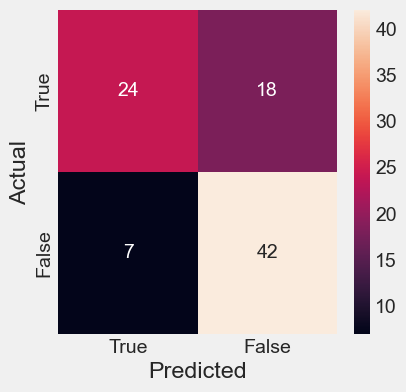

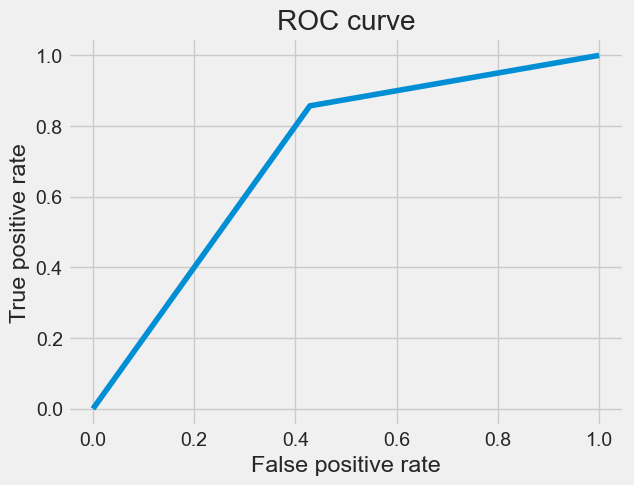

AUC score:  0.7142857142857143


In [60]:
import seaborn as sns
# create confusion matrix

conf_mat = confusion_matrix(y_test, y_pred)
# print('Confusion matrix:', conf_mat)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
auc = roc_auc_score(y_test, y_pred)
print("AUC score: ", auc)